# WeatherPy
----

#### Note
Initial code snippets for setup were provided by the boot camp. My own code starts at block #3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
N = len(cities)
N

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather"

# display sample request - try a different index if an error is returned

response = requests.get(url, params={
    'appid': api_key,
    'q': cities[0],
    'units': 'imperial'
})

response.json()

{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.03},
 'dt': 1578351606,
 'id': 4020109,
 'main': {'feels_like': 81.16,
  'grnd_level': 1010,
  'humidity': 70,
  'pressure': 1010,
  'sea_level': 1010,
  'temp': 80.55,
  'temp_max': 80.55,
  'temp_min': 80.55},
 'name': 'Atuona',
 'sys': {'country': 'PF', 'sunrise': 1578322894, 'sunset': 1578368504},
 'timezone': -34200,
 'weather': [{'description': 'clear sky',
   'icon': '01d',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'deg': 27, 'speed': 12.33}}

In [4]:
lat, long, temp, humidity, cloudiness, windspeed = [], [], [], [], [], []
time_requested = time.ctime()

for i, city in enumerate(cities):
    
    print(f'Processing Record {i} of {N}: "{city}"...')
    response = requests.get(url, params={'appid': api_key, 'q': city})
    
    if response.status_code == 200:
        json = response.json()
        lat.append(json['coord']['lat'])
        long.append(json['coord']['lon'])
        temp.append(json['main']['temp'])
        humidity.append(json['main']['humidity'])
        cloudiness.append(json['clouds']['all'])
        windspeed.append(json['wind']['speed'])
    else:
        print(f'\t{response.status_code} Error: {response.reason}')
        lat.append(np.NaN)
        long.append(np.NaN)
        temp.append(np.NaN)
        humidity.append(np.NaN)
        cloudiness.append(np.NaN)
        windspeed.append(np.NaN)

Processing Record 0 of 618: "atuona"...
Processing Record 1 of 618: "bredasdorp"...
Processing Record 2 of 618: "rikitea"...
Processing Record 3 of 618: "longyearbyen"...
Processing Record 4 of 618: "bluff"...
Processing Record 5 of 618: "arshan"...
Processing Record 6 of 618: "busselton"...
Processing Record 7 of 618: "bengkulu"...
	404 Error: Not Found
Processing Record 8 of 618: "tera"...
Processing Record 9 of 618: "carnarvon"...
Processing Record 10 of 618: "pisco"...
Processing Record 11 of 618: "butaritari"...
Processing Record 12 of 618: "zhigansk"...
Processing Record 13 of 618: "airai"...
Processing Record 14 of 618: "kapaa"...
Processing Record 15 of 618: "port alfred"...
Processing Record 16 of 618: "barentsburg"...
	404 Error: Not Found
Processing Record 17 of 618: "tasiilaq"...
Processing Record 18 of 618: "severo-yeniseyskiy"...
Processing Record 19 of 618: "cabedelo"...
Processing Record 20 of 618: "mar del plata"...
Processing Record 21 of 618: "marsa matruh"...
Proces

Processing Record 178 of 618: "celestun"...
Processing Record 179 of 618: "viytivka"...
Processing Record 180 of 618: "khasan"...
Processing Record 181 of 618: "saldanha"...
Processing Record 182 of 618: "richards bay"...
Processing Record 183 of 618: "kalabo"...
Processing Record 184 of 618: "port elizabeth"...
Processing Record 185 of 618: "olafsvik"...
	404 Error: Not Found
Processing Record 186 of 618: "scottsbluff"...
Processing Record 187 of 618: "xining"...
Processing Record 188 of 618: "nemuro"...
Processing Record 189 of 618: "ahipara"...
Processing Record 190 of 618: "vestmanna"...
Processing Record 191 of 618: "vardo"...
Processing Record 192 of 618: "shimoda"...
Processing Record 193 of 618: "chumikan"...
Processing Record 194 of 618: "sangar"...
Processing Record 195 of 618: "vagay"...
Processing Record 196 of 618: "sinjar"...
Processing Record 197 of 618: "ilulissat"...
Processing Record 198 of 618: "cicuco"...
Processing Record 199 of 618: "tezu"...
Processing Record 200

	404 Error: Not Found
Processing Record 356 of 618: "fukumitsu"...
Processing Record 357 of 618: "praia da vitoria"...
Processing Record 358 of 618: "tarnowskie gory"...
Processing Record 359 of 618: "luwuk"...
Processing Record 360 of 618: "tucuman"...
Processing Record 361 of 618: "laerdalsoyri"...
Processing Record 362 of 618: "majenang"...
Processing Record 363 of 618: "hamirpur"...
Processing Record 364 of 618: "listvyanka"...
Processing Record 365 of 618: "tazovskiy"...
Processing Record 366 of 618: "vieques"...
Processing Record 367 of 618: "carutapera"...
Processing Record 368 of 618: "rawson"...
Processing Record 369 of 618: "atar"...
Processing Record 370 of 618: "encs"...
Processing Record 371 of 618: "taber"...
Processing Record 372 of 618: "yar-sale"...
Processing Record 373 of 618: "tual"...
Processing Record 374 of 618: "margate"...
Processing Record 375 of 618: "aykhal"...
Processing Record 376 of 618: "shahrud"...
Processing Record 377 of 618: "nuuk"...
Processing Reco

Processing Record 532 of 618: "la paz"...
Processing Record 533 of 618: "aksu"...
Processing Record 534 of 618: "contai"...
Processing Record 535 of 618: "santa helena de goias"...
Processing Record 536 of 618: "santa rosalia"...
Processing Record 537 of 618: "chernyshevskiy"...
Processing Record 538 of 618: "namatanai"...
Processing Record 539 of 618: "urusha"...
Processing Record 540 of 618: "chamba"...
Processing Record 541 of 618: "kangaatsiaq"...
Processing Record 542 of 618: "grapevine"...
Processing Record 543 of 618: "saint-claude"...
Processing Record 544 of 618: "izumo"...
Processing Record 545 of 618: "tagusao"...
Processing Record 546 of 618: "uvinza"...
Processing Record 547 of 618: "taoudenni"...
Processing Record 548 of 618: "sao miguel do araguaia"...
Processing Record 549 of 618: "fort nelson"...
Processing Record 550 of 618: "tingrela"...
	404 Error: Not Found
Processing Record 551 of 618: "karratha"...
Processing Record 552 of 618: "mopipi"...
Processing Record 553 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(
    
    {'lat': lat,
     'long': long,
     'temp': temp,
     'humidity': humidity,
     'cloudiness': cloudiness,
     'windspeed': windspeed},
    
    index=cities
    
).dropna()

df.head()

,lat,long,temp,humidity,cloudiness,windspeed
atuona,-9.80,-139.03,300.12,70.0,0.0,5.51
bredasdorp,-34.53,20.04,290.38,72.0,94.0,1.50
rikitea,-23.12,-134.97,298.10,74.0,95.0,5.43
longyearbyen,78.22,15.63,261.15,55.0,40.0,6.20
bluff,-23.58,149.07,301.79,56.0,60.0,6.13


In [6]:
df.describe()

,lat,long,temp,humidity,cloudiness,windspeed
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,20.280162,17.292244,283.028815,73.587074,52.669659,3.619336
std,32.836621,89.392456,16.207356,19.576406,37.816131,2.645159
min,-54.810000,-179.170000,234.150000,8.000000,0.000000,0.180000
25%,-5.670000,-65.110000,272.400000,63.000000,18.000000,1.540000
50%,23.830000,18.860000,287.970000,76.000000,60.000000,3.100000
75%,46.450000,95.320000,296.760000,89.000000,90.000000,5.100000
max,78.220000,178.420000,308.150000,100.000000,100.000000,23.290000


In [7]:
df.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

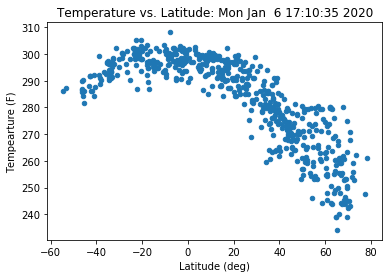

In [8]:
df.plot.scatter('lat', 'temp')
plt.title(f'Temperature vs. Latitude: {time_requested}')
plt.xlabel('Latitude (deg)')
plt.ylabel('Tempearture (F)')
plt.show()

#### Latitude vs. Humidity Plot

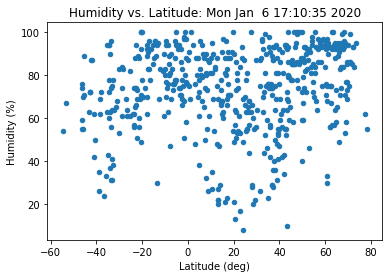

In [9]:
df.plot.scatter('lat', 'humidity')
plt.title(f'Humidity vs. Latitude: {time_requested}')
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.show()

#### Latitude vs. Cloudiness Plot

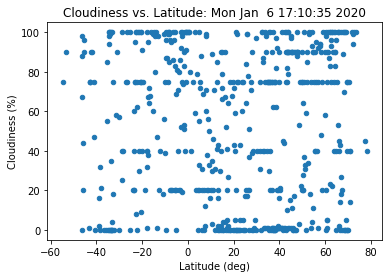

In [10]:
df.plot.scatter('lat', 'cloudiness')
plt.title(f'Cloudiness vs. Latitude: {time_requested}')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.show()

#### Latitude vs. Wind Speed Plot

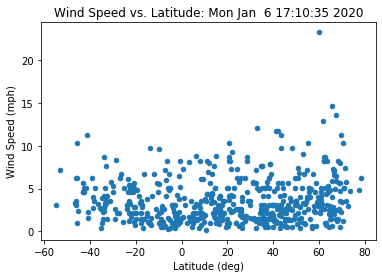

In [11]:
df.plot.scatter('lat', 'windspeed')
plt.title(f'Wind Speed vs. Latitude: {time_requested}')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.show()